#一：導入模組

In [1]:
import wordcloud#詞雲展示庫
import numpy as np# numpy資料處理庫
import pandas as pd
import jieba# 結巴分詞
import jieba.analyse
from collections import Counter# 詞頻統計庫
from PIL import Image # 影像處理庫
import matplotlib.pyplot as plt # 圖像展示庫
from imageio import imread#圖片讀入
from gensim import corpora,models,similarities
import gensim

In [2]:
jieba.set_dictionary('tc_dict.txt') #轉為繁體字分詞

In [3]:
jieba.load_userdict('userdict.txt') #增加個人辭典

Building prefix dict from d:\python\@project\NLP\book\tc_dict.txt ...
Loading model from cache C:\Users\ACER\AppData\Local\Temp\jieba.ud99fc68e32bf877d02f8413db0543ca9.cache
Loading model cost 0.856 seconds.
Prefix dict has been built successfully.


In [6]:
 def WordCloud(file, num): 
    text = open(file, encoding="utf-8")
    text_seps = []
    text_lines = []
    for line in text.readlines():
        text_lines.append(line)
        text_sep = jieba.lcut(line)
        if len(text_sep) > 1 and text_sep != '\r': #换行
            text_seps.append(text_sep)#分词后的结果放入

    df_stopwords=pd.read_csv("stopwords_tc.txt",index_col=False,sep="\t",quoting=3,names=['stopword'], encoding='utf-8')
    stopwords_list=df_stopwords.stopword.values.tolist()

    stopwords_list.append(' ')
    stopwords_list.append('\u3000')
    stopwords_list.append('\n')


    def drop_stopwords(contents,stopwords):
        content_clean = []# 放清理后的分词
        all_words = []
        for line in text_seps:
            line_clean=[]
            for word in line:
                if word in stopwords_list:
                    continue
                line_clean.append(word)
                if len(word)>num:
                    all_words.append(str(word))
            content_clean.append(line_clean)
        return content_clean, all_words

    content_clean,all_words = drop_stopwords(text_seps,stopwords_list)
        
    tf= Counter(all_words)


    #导入背景图片后的词云
    font = r'msjh.ttc'#导入字体
    mask = imread('circle.png')#读入图片
    wc= wordcloud.WordCloud(font_path=font,mask=mask,background_color='white',scale=2)
    wc.generate_from_frequencies(tf)
    plt.figure(figsize=(16,12))
    plt.imshow(wc) # 显示词云
    plt.axis('off') # 关闭坐标轴
    plt.show()
    wc.to_file(file[:-4]+'.jpg')#保存词云

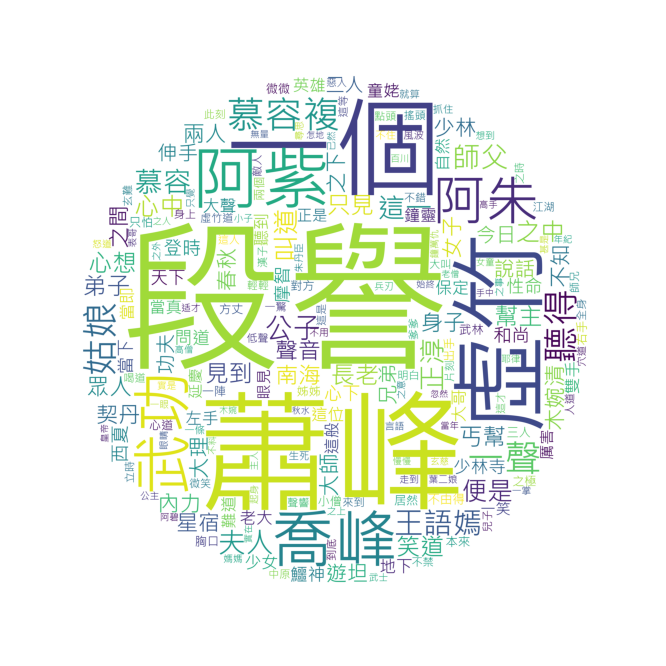

In [7]:
WordCloud('tenron.txt', 1)